In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt

from src.Functions import ReLU, Identity, MSELoss
from src.Layer import Layer
from src.Network import Network
from src.Neuron import Neuron
from src.Var import Var

In [60]:
Layers = [
    Layer(1, 4, ReLU(), 'l0'),
    Layer(4, 4, ReLU(), 'l1'),
    Layer(4, 1, Identity(), 'l2') 
    ]

n = Network(Layers)

In [61]:
X = [[x] for x in np.linspace(0, np.pi, 100)]
#Y = [[np.random.normal(x, 0.01)] for x in X]
Y = [x for x in X]

Data = [(X[n], Y[n]) for n in range(len(X))]

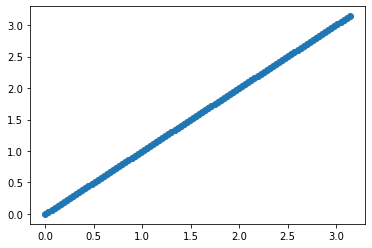

In [62]:
plt.scatter(X, Y)

In [63]:
epochs = 60
lr = 0.1
lrSchedulerStep = 40

print('Train for {} epochs.'.format(epochs))

for epoch in range(epochs):
    if (epoch+1) % lrSchedulerStep == 0:
        lr *= 0.1

    running_loss = 0
    random.shuffle(Data)

    for (x, y) in Data:
        mse = MSELoss(x, n, y, False)

        n.zero_grad()
        mse.backward()
        n.optimize(lr)

        running_loss += mse.loss
        #print('x = {}, pred = {}, y = {}'.format(x, y, mse.pred))
        
    print('Epoch: {}, Loss = {}, lr = {}'.format(epoch, running_loss.val/len(X), lr))

Train for 60 epochs.
Epoch: 0, Loss = 0.3884545431401803, lr = 0.1
Epoch: 1, Loss = 0.4892604054980585, lr = 0.1
Epoch: 2, Loss = 0.9820378985414004, lr = 0.1
Epoch: 3, Loss = 0.9658637699232122, lr = 0.1
Epoch: 4, Loss = 0.9665107313937794, lr = 0.1
Epoch: 5, Loss = 0.9503841721670006, lr = 0.1
Epoch: 6, Loss = 0.9494079792046185, lr = 0.1
Epoch: 7, Loss = 0.9817678938650114, lr = 0.1
Epoch: 8, Loss = 0.9478775632457384, lr = 0.1
Epoch: 9, Loss = 0.9703174017293389, lr = 0.1
Epoch: 10, Loss = 0.9414526107978969, lr = 0.1
Epoch: 11, Loss = 0.9402651647817472, lr = 0.1
Epoch: 12, Loss = 0.8845274903426723, lr = 0.1
Epoch: 13, Loss = 0.9023811352301709, lr = 0.1
Epoch: 14, Loss = 0.9386966933718387, lr = 0.1
Epoch: 15, Loss = 0.9584696919279277, lr = 0.1
Epoch: 16, Loss = 0.9697945886388282, lr = 0.1
Epoch: 17, Loss = 0.9136171771120247, lr = 0.1
Epoch: 18, Loss = 0.9498536586742107, lr = 0.1
Epoch: 19, Loss = 0.9266905138801662, lr = 0.1
Epoch: 20, Loss = 0.953516632010938, lr = 0.1
Epo

In [29]:
X_test = [[x] for x in np.linspace(0, np.pi, 100)]
Y_pred = [n(x)[0].val for x in X_test]

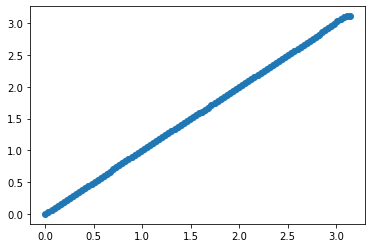

In [30]:
plt.scatter(X_test, Y_pred)

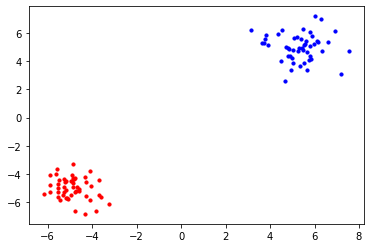

In [12]:
from sklearn.datasets.samples_generator import make_blobs

centers = [(-5, -5), (5, 5)]
cluster_std = [0.8, 1]

X, Y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
Data = [(X[n], Y[n]) for n in range(len(X))]

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

In [13]:
Y

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
Layers = [
    Layer(2, 8, ReLU(), 'l0'),
    Layer(8, 8, ReLU(), 'l1'),
    Layer(8, 2, Identity(), 'l2') 
    ]

n = Network(Layers)